<a href="https://colab.research.google.com/github/aisha-partha/AIMLOps-Assignments/blob/main/Experimentation_Phase_1_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimentation_Phase : 1. Data_Exploration & Preliminary Model


## Learning Objectives


* Understand & explore the data
* Perform data preprocessing
* Apply  ML algorithms on **Titanic** dataset



## Dataset Description

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of many passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

[ Data Set Link: Kaggle competition](https://www.kaggle.com/competitions/titanic)

<br/>

### Data Set Characteristics:

**PassengerId:** Id of the passengers

**Survived:** Survived or Not, information

**Pclass:** Socio-economic status (SES)
  * 1st = Upper
  * 2nd = Middle
  * 3rd = Lower

**Name:** Surname, first names of the Passengers

**Sex:** Gender of the passengers

**Age:** Age of the passengers

**SibSp:**	No. of siblings/spouse of the passenger aboard the Titanic

**Parch:**	No. of parents/children of the passenger aboard the Titanic

**Ticket:**	Ticket number

**Fare:** Passenger fare

**Cabin:**	Cabin number

**Embarked:** Port of Embarkation
  * S = Southampton
  * C = Cherbourg
  * Q = Queenstown


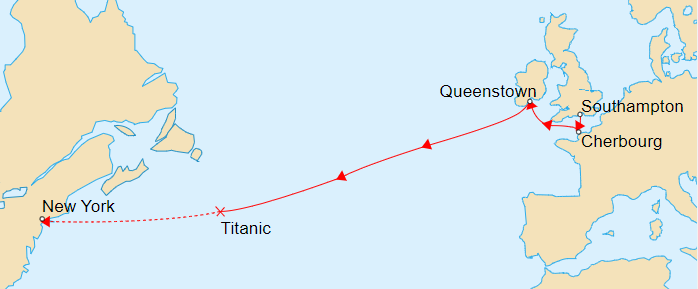

## Problem Statement

Build a predictive model that answers the question: **“what sort of people were more likely to survive?”** using titanic's passenger data (ie name, age, gender, socio-economic class, etc).

In [ ]:
# @title Download the datasets
from IPython import get_ipython

ipython = get_ipython()

notebook="U1_MH1_Data_Munging" #name of the notebook

def setup():
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/titanic.csv")
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/test_titanic.csv")
    print("Data downloaded successfully")
    return

setup()

In [ ]:
!ls

List of files present

**Note:** Use titanic.csv for training & testing purpose and Titanic_Test.csv for submitting the prediction on Kaggle competition.

## Import Required Packages

In [ ]:
import re
import numpy as np                # to work with arrays
import pandas as pd                 # for data manipulation
import matplotlib.pyplot as plt       # for visualization

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler        # for scaling the features
from sklearn.ensemble import RandomForestClassifier      # classification model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score        # for performance measuring

import joblib         # To persist/save the model

In [ ]:
# ========== NEW IMPORTS FOR PIPELINE BUILDING ========

# pipeline
from sklearn.pipeline import Pipeline

# for the preprocessors
from sklearn.base import BaseEstimator, TransformerMixin

## 1. Load & Explore the Data Set

* Understand different features in the training dataset
* Understand the data types of each columns
* Notice the columns of missing values




In [ ]:
# Load the dataset
data = pd.read_csv("titanic.csv")

In [ ]:
data.head()

In [ ]:
# Getting information about the dataset
data.info()

## Data Cleaning and Processing
## **2. Pre-pipeline Preparation**


 ### 2.1 Working on "SibSp" & "Parch" columns:
Combine columns "SibSp" & "Parch" and create another column that represents the total passengers in one ticket with the name "family_size". In each ticket, there might be Siblings/Spouses (SibSp =Number of Siblings/Spouses Aboard) or Parents/Children (Parch=Number of Parents/Children Aboard ) along with the passenger who booked the ticket.

  

In [ ]:
# Define a function that takes a dataframe as a parameter and returns a transformed
# Dataframe
def family_size(data_frame):
    df = data_frame.copy()
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    return df

In [ ]:
data = family_size(data)
data.info()

In [ ]:
data.head()

### 2.2 Working on "Cabin" column:
Find unique entries in the Cabin column. We can label all passengers in two categories having a cabin or not. Check the data type(use: type) of each entry of the Cabin. Convert a string data type into '1' i.e. passengers with cabin and others into '0' i.e. passengers without cabin.  Write a function for the above operation and apply it to the cabin column and create another column with the name " Has_cabin" containing only 0 or 1 entries.





In [ ]:
# Write a function that takes dataframe as a parameter and returns the transformed
# Dataframe after binary encoding of the values of 'Cabin' column

def process_cabin(data_frame):
    df = data_frame.copy()
    f1 = lambda x: 0 if type(x) == float else 1         ## Ternary Expression
    df['Has_cabin'] = df['Cabin'].apply(f1)
    return df

In [ ]:
data = process_cabin(data)
data.info()

In [ ]:
data.head()

### 2.3 Working on "Name" column :
Fetch titles from the name. We can map these titles with numbers and convert them into an integer by mapping with relative numbers. Use: concept of the regular expression.

In [ ]:
# Extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'

In [ ]:
get_title('heranl Mr.')

In [ ]:
data['Name'].apply(get_title)

In [ ]:
data['Title'] = data['Name'].apply(get_title)

In [ ]:
data['Title'].unique()

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
# drop unnecessary variables

data.drop(labels=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

# display data
data.info()

In [ ]:
data.head()

## 3: Data Exploration
### Find numerical and categorical variables

In [ ]:
target = 'Survived'

In [ ]:
# List of numerical columns
vars_num = [c for c in data.columns if data[c].dtypes!='O' ]#and c!=target]

# List of categorical columns
vars_cat = [c for c in data.columns if data[c].dtypes=='O']

print('Number of numerical variables: {}'.format(len(vars_num)),":" , vars_num)

print('Number of categorical variables: {}'.format(len(vars_cat)),":" , vars_cat)


#### Find missing values in variables

In [ ]:
# first in numerical variables
data[vars_num].isnull().mean()

In [ ]:
# now in categorical variables
data[vars_cat].isnull().mean()

### Determine cardinality of categorical variables

In [ ]:
# Unique categories in categorical variables
data[vars_cat].nunique()

### Determine the distribution of numerical variables

In [ ]:
# Plot a Histogram
data[vars_num].hist(bins=30, figsize=(10,10))

## 4: Split the data into train and test set
Note: Apply all your data preprocessing steps in train set first and keep test set aside.

In [ ]:
# Features
x = data.drop('Survived', axis=1)

# Target
y = data['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape

## 5. Feature Engineering

**Numerical variables:  Age column need to fill.**

### 5.1 Working on Age column :
Find the number of NaN entries in the age column and their row index. Calculate the mean, Standard deviation of the Age column and check the distribution of the age column.We can fill the missing values with randomly generated integer values between (mean+Standard deviation, mean-Standard deviation). Use : np.isnan; np.random.randint; concept of slicing dataframe. Convert the age column as an integer data type.



In [ ]:
age_avg = X_train['Age'].mean()   # Average Age
print("Mean of Age :", age_avg)

age_std = X_train['Age'].std()   # Standard Deviation
print("Std of Age :",age_std)

age_null_count = X_train['Age'].isnull().sum()         # Number of null records in this feature
print("Count of Nan in Age column :",age_null_count)

## Plotting the histogram plot
X_train['Age'].plot(kind='hist',bins=8,edgecolor='r')

In [ ]:
# Define a function, this takes dataframe as a parameter and returns the transformed
# Dataframe, filling the missing values of age feature as discussed above.

def process_age(data_frame):

    df = data_frame.copy()
    np.random.seed(0)
    age_avg = 29.54
    age_std = 14.47
    age_null_count = df['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    df.loc[np.isnan(df['Age']),'Age'] = age_null_random_list
    df['Age'] = df['Age'].astype(int)
    return df

In [ ]:
X_train = process_age(X_train)
X_train.info()

**Categorical variables:  Embarked    0.002245 column need to fill.**
### 5.2 Working on "Embarked" column :
The "embarked" column represents the port of Embarkation: Cherbourg(C), Queenstown(Q), and  Southampton(S ). Thus, the entries are of three categories in this column. Fill in the missing rows in this column. We can fill it with the most frequent category. Map these categorical string entries into numerical.



In [ ]:
print(X_train.Embarked.unique())        # Unique Categories
print(X_train.Embarked.isnull().sum())          # Number of classes
print(X_train.Embarked.mode())          # Most frequent category

In [ ]:
def process_embarked(data_frame):
    df = data_frame.copy()
    df['Embarked'] = df['Embarked'].fillna('S')
    df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    return df

In [ ]:
X_train = process_embarked(X_train)
X_train.info()

In [ ]:
X_train.head()

### **Encodings**

### 5.3 Working on "sex" & "Title" columns :
Map the Sex column as 'female' : 0, 'male': 1, and convert it into an integer data type.



In [ ]:
X_train['Sex'] = X_train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [ ]:
# Map these categorical string entries into numerical.
X_train['Title'] = X_train['Title'].map( {'Mrs': 4, 'Master':3 ,'Miss': 2, 'Mr': 1,'Other':0} ).astype(int)

In [ ]:
X_train.head()

### 5.4 Apply Standard Scalar

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled[0,:]

### 5.5 Create a single function for preprocessing the test set (X_test) and apply it.
#### **Note**: All the pre-processing steps that were applied on the train set before ML Modelling are also applied on the test set before passing through the predict function.

In [ ]:
## Create a function

def pre_process(data):

    df = data.copy()

    ## working on Embarked column
    df['Embarked'] = df['Embarked'].fillna('S')

    ## Working on Age column
    np.random.seed(0)
    age_avg = 29.54
    age_std = 14.47
    age_null_count = df['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    df.loc[np.isnan(df['Age']),'Age'] = age_null_random_list
    df['Age'] = df['Age'].astype(int)

    ## Encoding
    df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    # Mapping tille categorical string entries into numerical.
    df['Title'] = df['Title'].map( {'Mrs': 4, 'Master':3 ,'Miss': 2, 'Mr': 1,'Other':0} ).astype(int)

    #df.Fare=df.Fare.fillna(df.Fare.mean())
    return df

In [ ]:
## Applyting above function on X_test
x_test = pre_process(X_test)

x_test.info()
x_test.head()


### 5.6 Apply standard Scalar transformation to x_test





In [ ]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled[0,:]

### Exercise 6. Apply Multiple ML Algo. & display the accuracy
#### Expected Accuracy >= 80%

#### **Random Forest**


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 150, max_depth = 5,random_state = 42)

In [ ]:
# Fit the model
model_rf.fit(X_train_scaled, y_train)

# Predict the model
y_pred = model_rf.predict(x_test_scaled)

# Calculate the accuracy
print("Accuracy(in %):", accuracy_score(y_test, y_pred)*100)
print("F1-score(in %):", f1_score(y_test, y_pred)*100)